# Feasible vs Infeasible Solutions: What Can Be Implemented

This notebook demonstrates a critical distinction: **feasible solutions** (can be implemented) versus **infeasible solutions** (violate constraints and cannot be implemented).

Understanding this distinction is essential because:
- Optimization only finds **feasible solutions** (ones that satisfy all constraints)
- If no feasible solutions exist, optimization cannot find a solution
- Understanding feasibility helps you interpret optimization results correctly
- You must ensure your constraints allow feasible solutions to exist


## Key Concepts

**Feasible Solutions** are ones that can actually be implemented:
- They satisfy all constraints
- They can be implemented in the real world
- Examples: Production plan within capacity, schedule within budget, route that doesn't violate regulations

**Infeasible Solutions** violate one or more constraints:
- They cannot be implemented
- They exceed budgets, violate capacity limits, or break regulations
- Optimization will not recommend infeasible solutions

**Critical insight**: Optimization only finds feasible solutions. If constraints are too restrictive (no feasible solutions exist), optimization cannot help until constraints are relaxed.


## Scenario: Production Scheduling

You manage a factory that must schedule production for two products. You have constraints:
- **Budget limit**: $100,000
- **Production capacity**: 1,000 total units
- **Labor hours**: 800 hours available

**Decision**: How many units of Product A and Product B to produce?

Some solutions are **feasible** (satisfy all constraints) and some are **infeasible** (violate constraints).


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.


In [61]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value


## Step 3: Define the Problem

Set up the production scheduling problem with constraints:


In [63]:
# Problem inputs
profit_A = 50  # Profit per unit of Product A ($)
profit_B = 40  # Profit per unit of Product B ($)

cost_A = 30  # Cost per unit of Product A ($)
cost_B = 25  # Cost per unit of Product B ($)

# CONSTRAINTS (must be satisfied)
max_budget = 25000  # Maximum budget ($) - set to make constraint binding for some solutions
max_capacity = 1000  # Maximum total production capacity (units)
max_labor = 800  # Maximum labor hours available
labor_per_A = 0.6  # Labor hours per unit of A
labor_per_B = 0.8  # Labor hours per unit of B

print("PROBLEM SETUP:")
print(f"  Profit per A: ${profit_A}, Cost per A: ${cost_A}")
print(f"  Profit per B: ${profit_B}, Cost per B: ${cost_B}")
print(f"\nCONSTRAINTS (Must be satisfied):")
print(f"  Budget limit: ${max_budget:,}")
print(f"  Capacity limit: {max_capacity} units")
print(f"  Labor limit: {max_labor} hours")


PROBLEM SETUP:
  Profit per A: $50, Cost per A: $30
  Profit per B: $40, Cost per B: $25

CONSTRAINTS (Must be satisfied):
  Budget limit: $25,000
  Capacity limit: 1000 units
  Labor limit: 800 hours


## Step 4: Check Example Solutions for Feasibility

Let's evaluate several example solutions to see which are feasible and which are infeasible:


## Step 5: Visualize Constraints

The following visualization shows each constraint separately. This helps you understand:

- **Each plot shows ONE constraint** (Capacity, Budget, or Labor)
- **The colored points** show whether each solution is feasible (green) or infeasible (red) **overall** (considering ALL constraints together)
- **The constraint line** shows the boundary for that specific constraint
  - Points **below or on** the line satisfy that constraint
  - Points **above** the line violate that constraint

**Important Notes**:
- A point can be below a constraint line (satisfies that constraint) but still be red (infeasible overall) because it violates a different constraint. For example, a solution might satisfy the budget constraint but violate the capacity constraint, making it infeasible overall.
- **Y-axis scales differ**: The Budget Constraint plot has an extended y-axis (0-4500) to show the budget limit line, which is at B=4000 when A=0 and B=2800 when A=1000. The other plots use 0-1000 to focus on the visible solution points. This is because the budget constraint is very loose (not binding) in the visible region—all shown points satisfy it.

In [64]:
# Example solutions to evaluate
example_solutions = [
    {'A': 400, 'B': 400, 'Name': 'Solution 1: Balanced'},
    {'A': 600, 'B': 500, 'Name': 'Solution 2: More A'},
    {'A': 500, 'B': 600, 'Name': 'Solution 3: More B'},
    {'A': 800, 'B': 400, 'Name': 'Solution 4: Heavy A'},
    {'A': 300, 'B': 800, 'Name': 'Solution 5: Heavy B'},
]

results = []

for sol in example_solutions:
    a, b = sol['A'], sol['B']
    
    # Calculate values
    total_units = a + b
    total_cost = cost_A * a + cost_B * b
    total_labor = labor_per_A * a + labor_per_B * b
    total_profit = profit_A * a + profit_B * b
    
    # Check constraints
    budget_ok = total_cost <= max_budget
    capacity_ok = total_units <= max_capacity
    labor_ok = total_labor <= max_labor
    
    # Determine feasibility
    feasible = budget_ok and capacity_ok and labor_ok
    
    # Identify which constraints are violated
    violations = []
    if not budget_ok:
        violations.append(f"Budget (${total_cost:,.0f} > ${max_budget:,})")
    if not capacity_ok:
        violations.append(f"Capacity ({total_units} > {max_capacity})")
    if not labor_ok:
        violations.append(f"Labor ({total_labor:.1f} > {max_labor})")
    
    results.append({
        'Solution': sol['Name'],
        'A': a,
        'B': b,
        'Total Cost': total_cost,
        'Total Units': total_units,
        'Total Labor': total_labor,
        'Total Profit': total_profit,
        'Feasible': 'Yes' if feasible else 'No',
        'Violations': ', '.join(violations) if violations else 'None'
    })

results_df = pd.DataFrame(results)
print("FEASIBILITY EVALUATION:")
print("=" * 80)
display(results_df.round(2))

print("\nKey Insight:")
print("  - Feasible solutions satisfy ALL constraints")
print("  - Infeasible solutions violate at least ONE constraint")
print("  - Optimization will only find feasible solutions")


FEASIBILITY EVALUATION:


,Solution,A,B,Total Cost,Total Units,Total Labor,Total Profit,Feasible,Violations
0,Solution 1: Balanced,400,400,22000,800,560.0,36000,Yes,None
1,Solution 2: More A,600,500,30500,1100,760.0,50000,No,"Budget ($30,500 > $25,000), Capacity (1100 > 1..."
2,Solution 3: More B,500,600,30000,1100,780.0,49000,No,"Budget ($30,000 > $25,000), Capacity (1100 > 1..."
3,Solution 4: Heavy A,800,400,34000,1200,800.0,56000,No,"Budget ($34,000 > $25,000), Capacity (1200 > 1..."
4,Solution 5: Heavy B,300,800,29000,1100,820.0,47000,No,"Budget ($29,000 > $25,000), Capacity (1100 > 1..."



Key Insight:
  - Feasible solutions satisfy ALL constraints
  - Infeasible solutions violate at least ONE constraint
  - Optimization will only find feasible solutions


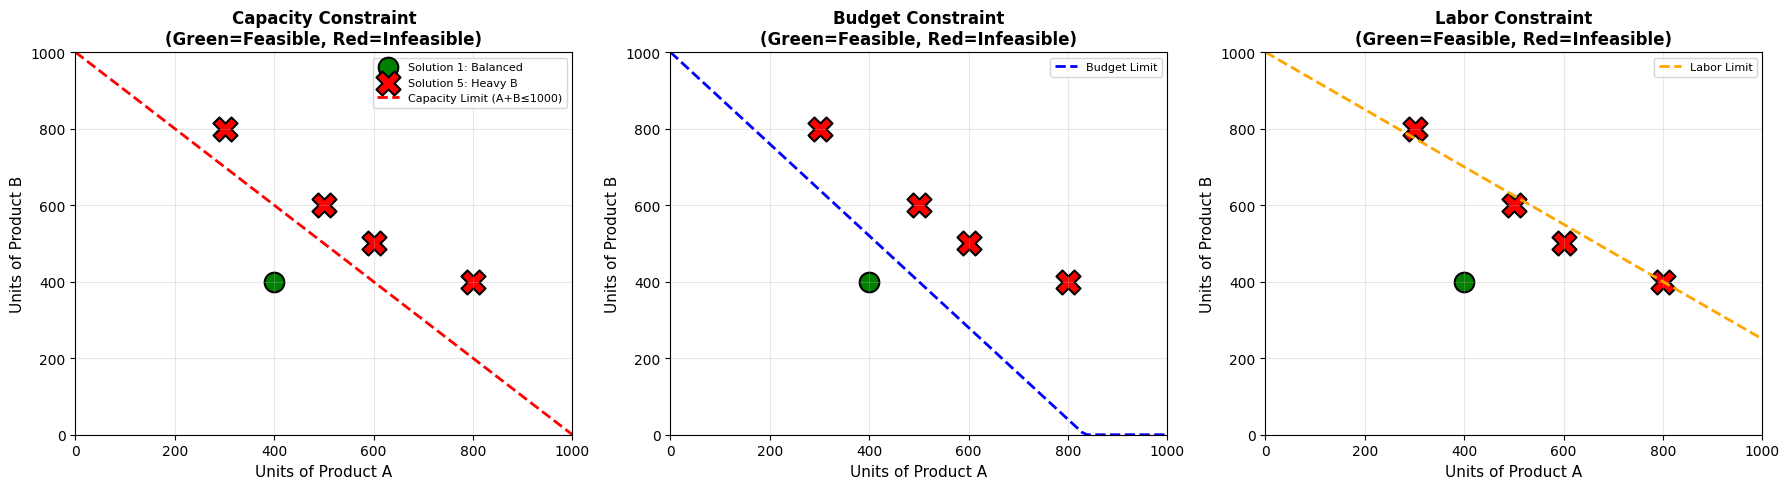


Key Insight:
  - Solutions below/on constraint lines satisfy that constraint
  - Solutions above constraint lines violate that constraint
  - Feasible solutions must satisfy ALL constraints simultaneously


In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Capacity constraint
ax1 = axes[0]
for idx, row in results_df.iterrows():
    color = 'green' if row['Feasible'] == 'Yes' else 'red'
    marker = 'o' if row['Feasible'] == 'Yes' else 'X'
    size = 200 if row['Feasible'] == 'Yes' else 300
    ax1.scatter(row['A'], row['B'], c=color, marker=marker, s=size, 
                edgecolors='black', linewidth=1.5, label=row['Solution'] if idx == 0 or idx == len(results_df)-1 else "")

# Capacity constraint line: A + B <= 1000
A_line = np.linspace(0, 1000, 100)
B_capacity = max_capacity - A_line
ax1.plot(A_line, B_capacity, 'r--', linewidth=2, label='Capacity Limit (A+B≤1000)')

ax1.set_xlabel('Units of Product A', fontsize=11)
ax1.set_ylabel('Units of Product B', fontsize=11)
ax1.set_title('Capacity Constraint\n(Green=Feasible, Red=Infeasible)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=8)
ax1.set_xlim(0, 1000)
ax1.set_ylim(0, 1000)

# Plot 2: Budget constraint
ax2 = axes[1]
for idx, row in results_df.iterrows():
    color = 'green' if row['Feasible'] == 'Yes' else 'red'
    marker = 'o' if row['Feasible'] == 'Yes' else 'X'
    size = 200 if row['Feasible'] == 'Yes' else 300
    ax2.scatter(row['A'], row['B'], c=color, marker=marker, s=size, 
                edgecolors='black', linewidth=1.5)

# Budget constraint: cost_A*A + cost_B*B <= max_budget
# This means: 30*A + 25*B <= 25000
# To plot the constraint boundary, we use the equality case: 30*A + 25*B = 25000
# Solving for B: B = (max_budget - cost_A*A) / cost_B
# This gives us the line where the budget constraint is exactly satisfied
# At A=0: B = 25000/25 = 1000
# At A=833: B = 0 (line hits x-axis)
B_budget = (max_budget - cost_A * A_line) / cost_B
B_budget = np.maximum(0, B_budget)  # Ensure B is non-negative (clip negative values to 0)
# Draw the budget constraint line
# Points below this line satisfy the budget constraint (cost < max_budget)
# Points above this line violate the budget constraint (cost > max_budget)
ax2.plot(A_line, B_budget, 'b--', linewidth=2, label='Budget Limit')

ax2.set_xlabel('Units of Product A', fontsize=11)
ax2.set_ylabel('Units of Product B', fontsize=11)
ax2.set_title('Budget Constraint\n(Green=Feasible, Red=Infeasible)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=8)
ax2.set_xlim(0, 1000)
ax2.set_ylim(0, 1000)

# Plot 3: Labor constraint
ax3 = axes[2]
for idx, row in results_df.iterrows():
    color = 'green' if row['Feasible'] == 'Yes' else 'red'
    marker = 'o' if row['Feasible'] == 'Yes' else 'X'
    size = 200 if row['Feasible'] == 'Yes' else 300
    ax3.scatter(row['A'], row['B'], c=color, marker=marker, s=size, 
                edgecolors='black', linewidth=1.5)

# Labor constraint: labor_per_A*A + labor_per_B*B <= 800
B_labor = (max_labor - labor_per_A * A_line) / labor_per_B
B_labor = np.maximum(0, B_labor)
ax3.plot(A_line, B_labor, 'orange', linestyle='--', linewidth=2, label='Labor Limit')

ax3.set_xlabel('Units of Product A', fontsize=11)
ax3.set_ylabel('Units of Product B', fontsize=11)
ax3.set_title('Labor Constraint\n(Green=Feasible, Red=Infeasible)', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper right', fontsize=8)
ax3.set_xlim(0, 1000)
ax3.set_ylim(0, 1000)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - Solutions below/on constraint lines satisfy that constraint")
print("  - Solutions above constraint lines violate that constraint")
print("  - Feasible solutions must satisfy ALL constraints simultaneously")


### Optimization Results Summary

The cell below displays the key results from the optimization model. This shows:

1. **Optimal Solution**: How many units of each product to produce
2. **Total Profit**: The profit achieved by this solution
3. **Feasibility Check**: Verification that the solution satisfies all constraints
4. **Key Insight**: What this tells us about optimization and feasibility

Note: The solver output (technical details about the solving process) is shown in the previous cell but can be ignored. The important information is displayed below.

## Step 6: Run Optimization to Find the Best Feasible Solution

Now we'll use optimization to find the best solution that satisfies all constraints. The code below:

1. **Creates an optimization model** with the objective to maximize profit
2. **Defines decision variables** (how many units of A and B to produce)
3. **Adds constraints** (budget, capacity, and labor limits)
4. **Solves the model** to find the optimal solution
5. **Verifies feasibility** by checking that the solution satisfies all constraints

The solver will output technical information about the solving process, but the important results are displayed in the next cell.

In [66]:
# Create optimization model
model = LpProblem("Production_Feasible", LpMaximize)

# Decision variables
produce_A = LpVariable("produce_A", lowBound=0, cat='Continuous')
produce_B = LpVariable("produce_B", lowBound=0, cat='Continuous')

# Objective: Maximize profit
model += profit_A * produce_A + profit_B * produce_B, "Total_Profit"

# Constraints (must be satisfied)
model += cost_A * produce_A + cost_B * produce_B <= max_budget, "Budget_Limit"
model += produce_A + produce_B <= max_capacity, "Capacity_Limit"
model += labor_per_A * produce_A + labor_per_B * produce_B <= max_labor, "Labor_Limit"

# Solve
model.solve()

# Get solution
optimal_A = value(produce_A)
optimal_B = value(produce_B)
optimal_profit = value(model.objective)

# Verify feasibility
optimal_cost = cost_A * optimal_A + cost_B * optimal_B
optimal_units = optimal_A + optimal_B
optimal_labor = labor_per_A * optimal_A + labor_per_B * optimal_B

print("OPTIMIZATION RESULT:")
print("=" * 60)
print(f"  Produce {optimal_A:.1f} units of Product A")
print(f"  Produce {optimal_B:.1f} units of Product B")
print(f"  Total Profit: ${optimal_profit:,.2f}")
print(f"\nFEASIBILITY CHECK:")
print(f"  Budget: ${optimal_cost:,.2f} <= ${max_budget:,} ✓" if optimal_cost <= max_budget else f"  Budget: ${optimal_cost:,.2f} > ${max_budget:,} ✗")
print(f"  Capacity: {optimal_units:.1f} <= {max_capacity} ✓" if optimal_units <= max_capacity else f"  Capacity: {optimal_units:.1f} > {max_capacity} ✗")
print(f"  Labor: {optimal_labor:.1f} <= {max_labor} ✓" if optimal_labor <= max_labor else f"  Labor: {optimal_labor:.1f} > {max_labor} ✗")
print(f"\nKey Insight:")
print(f"  - Optimization found a FEASIBLE solution (satisfies all constraints)")
print(f"  - Optimization will NEVER recommend an infeasible solution")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/133b1c40125b484693e692ef642e8df0-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/133b1c40125b484693e692ef642e8df0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 90 (2)
0  Obj -0 Dual inf 90 (2)
1  Obj 41666.667
Optimal - objective value 41666.667
Optimal objective 41666.66667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU second

In [67]:
# Display the optimization results (without solver output)
print("OPTIMIZATION RESULT:")
print("=" * 60)
print(f"  Produce {optimal_A:.1f} units of Product A")
print(f"  Produce {optimal_B:.1f} units of Product B")
print(f"  Total Profit: ${optimal_profit:,.2f}")
print(f"\nFEASIBILITY CHECK:")
print(f"  Budget: ${optimal_cost:,.2f} <= ${max_budget:,} ✓" if optimal_cost <= max_budget else f"  Budget: ${optimal_cost:,.2f} > ${max_budget:,} ✗")
print(f"  Capacity: {optimal_units:.1f} <= {max_capacity} ✓" if optimal_units <= max_capacity else f"  Capacity: {optimal_units:.1f} > {max_capacity} ✗")
print(f"  Labor: {optimal_labor:.1f} <= {max_labor} ✓" if optimal_labor <= max_labor else f"  Labor: {optimal_labor:.1f} > {max_labor} ✗")
print(f"\nKey Insight:")
print(f"  - Optimization found a FEASIBLE solution (satisfies all constraints)")
print(f"  - Optimization will NEVER recommend an infeasible solution")

OPTIMIZATION RESULT:
  Produce 833.3 units of Product A
  Produce 0.0 units of Product B
  Total Profit: $41,666.67

FEASIBILITY CHECK:
  Budget: $25,000.00 <= $25,000 ✓
  Capacity: 833.3 <= 1000 ✓
  Labor: 500.0 <= 800 ✓

Key Insight:
  - Optimization found a FEASIBLE solution (satisfies all constraints)
  - Optimization will NEVER recommend an infeasible solution


## Step 7: What Happens When Constraints Are Too Restrictive?

If constraints are too restrictive, no feasible solutions exist. This is called an **infeasible problem**.

The code below demonstrates this by:
1. **Setting impossible constraints**: Very low budget ($20,000), high capacity requirement (2000 units), and very low labor (500 hours)
2. **Creating an optimization model** with these impossible constraints
3. **Attempting to solve** the model
4. **Checking the status**: The solver will return status -1, indicating the problem is infeasible

**Key Learning**: When optimization returns status -1, it means NO solution exists that satisfies all constraints simultaneously. This is not a bug or failure—it's a mathematical fact that the constraints are contradictory.


### Infeasible Problem Results Summary

The cell below shows what happens when constraints are too restrictive. This demonstrates:

1. **The Scenario**: What constraints were changed to make the problem impossible
2. **Optimization Status**: The solver's response (Status -1 means infeasible)
3. **Key Insight**: Why the problem is infeasible and what this means

**Critical Understanding**: When optimization returns status -1 (infeasible), it means NO solution exists that satisfies all constraints. This is not a failure of the optimization algorithm—it's a problem with the constraints themselves. The constraints are contradictory and need to be relaxed.

In [68]:
# Scenario: Impossible constraints (too restrictive)
impossible_budget = 20000  # Very low budget
impossible_capacity = 2000  # High capacity requirement
impossible_labor = 500  # Very low labor

print("SCENARIO: Impossible Constraints")
print("=" * 60)
print(f"  Budget limit: ${impossible_budget:,} (was ${max_budget:,})")
print(f"  Capacity requirement: {impossible_capacity} units (was {max_capacity})")
print(f"  Labor limit: {impossible_labor} hours (was {max_labor})")
print(f"\nThese constraints are contradictory - no solution can satisfy all of them!")

# Create model with impossible constraints
model_impossible = LpProblem("Production_Impossible", LpMaximize)

produce_A_imp = LpVariable("produce_A_imp", lowBound=0, cat='Continuous')
produce_B_imp = LpVariable("produce_B_imp", lowBound=0, cat='Continuous')

model_impossible += profit_A * produce_A_imp + profit_B * produce_B_imp, "Total_Profit"

# Impossible constraints
model_impossible += cost_A * produce_A_imp + cost_B * produce_B_imp <= impossible_budget, "Budget_Limit"
model_impossible += produce_A_imp + produce_B_imp >= impossible_capacity, "Capacity_Requirement"  # Note: >= for requirement
model_impossible += labor_per_A * produce_A_imp + labor_per_B * produce_B_imp <= impossible_labor, "Labor_Limit"

# Try to solve
model_impossible.solve()

# Check status
status = model_impossible.status
print(f"\nOptimization Status: {status}")
print(f"  Status -1 = Infeasible (no solution exists)")
print(f"  Status 1 = Optimal (solution found)")

if status == -1:
    print(f"\n✓ Confirmed: Problem is INFEASIBLE")
    print(f"  No solution exists that satisfies all constraints")
    print(f"  The problem is not that optimization failed; the constraints are impossible")
else:
    print(f"\nSolution found (unexpected!)")


SCENARIO: Impossible Constraints
  Budget limit: $20,000 (was $25,000)
  Capacity requirement: 2000 units (was 1000)
  Labor limit: 500 hours (was 800)

These constraints are contradictory - no solution can satisfy all of them!
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ad7dcf4fdcc8497cbbaa31fbf6ce975a-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ad7dcf4fdcc8497cbbaa31fbf6ce975a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolera

In [69]:
# Display the infeasible problem results (without solver output)
print("SCENARIO: Impossible Constraints")
print("=" * 60)
print(f"  Budget limit: ${impossible_budget:,} (was ${max_budget:,})")
print(f"  Capacity requirement: {impossible_capacity} units (was {max_capacity})")
print(f"  Labor limit: {impossible_labor} hours (was {max_labor})")
print(f"\nThese constraints are contradictory - no solution can satisfy all of them!")
print(f"\nOptimization Status: {status}")
print(f"  Status -1 = Infeasible (no solution exists)")
print(f"  Status 1 = Optimal (solution found)")
print(f"\n✓ Confirmed: Problem is INFEASIBLE")
print(f"  No solution exists that satisfies all constraints")
print(f"  The problem is not that optimization failed; the constraints are impossible")

SCENARIO: Impossible Constraints
  Budget limit: $20,000 (was $25,000)
  Capacity requirement: 2000 units (was 1000)
  Labor limit: 500 hours (was 800)

These constraints are contradictory - no solution can satisfy all of them!

Optimization Status: -1
  Status -1 = Infeasible (no solution exists)
  Status 1 = Optimal (solution found)

✓ Confirmed: Problem is INFEASIBLE
  No solution exists that satisfies all constraints
  The problem is not that optimization failed; the constraints are impossible


### Fixed Problem Results Summary

The cell below shows how relaxing constraints makes an infeasible problem solvable. This demonstrates:

1. **Constraint Changes**: How each constraint was adjusted (budget increased, capacity requirement reduced, labor increased)
2. **New Solution**: The optimal solution found after relaxing constraints
3. **Key Insight**: The relationship between constraint tightness and problem feasibility

**Critical Understanding**: When a problem is infeasible, you must relax (loosen) constraints to allow feasible solutions. This might mean increasing budget limits, reducing capacity requirements, or increasing resource availability. The optimization algorithm can then find solutions once constraints allow them.

## Step 8: Fixing an Infeasible Problem

When a problem is infeasible, you need to relax (loosen) constraints to allow feasible solutions.

The code below demonstrates this by:
1. **Relaxing the constraints**: Increasing budget to $50,000, reducing capacity requirement to 800 units, and increasing labor to 600 hours
2. **Creating a new optimization model** with these relaxed constraints
3. **Solving the model**: Now the solver can find a feasible solution
4. **Displaying the results**: Showing the optimal solution that satisfies all relaxed constraints

**Key Learning**: When a problem is infeasible, you must adjust the constraints to make them less restrictive. This might mean increasing resource limits, reducing requirements, or changing the problem structure. Once constraints allow feasible solutions, optimization can find them.


In [70]:
# Fix: Relax constraints to make problem feasible
relaxed_budget = 50000  # Increased budget
relaxed_capacity = 800  # Reduced capacity requirement
relaxed_labor = 600  # Increased labor

print("FIXING INFEASIBLE PROBLEM: Relax Constraints")
print("=" * 60)
print(f"  Budget: ${impossible_budget:,} → ${relaxed_budget:,} (increased)")
print(f"  Capacity: {impossible_capacity} → {relaxed_capacity} (reduced requirement)")
print(f"  Labor: {impossible_labor} → {relaxed_labor} (increased)")

# Create model with relaxed constraints
model_fixed = LpProblem("Production_Fixed", LpMaximize)

produce_A_fix = LpVariable("produce_A_fix", lowBound=0, cat='Continuous')
produce_B_fix = LpVariable("produce_B_fix", lowBound=0, cat='Continuous')

model_fixed += profit_A * produce_A_fix + profit_B * produce_B_fix, "Total_Profit"

# Relaxed constraints
model_fixed += cost_A * produce_A_fix + cost_B * produce_B_fix <= relaxed_budget, "Budget_Limit"
model_fixed += produce_A_fix + produce_B_fix >= relaxed_capacity, "Capacity_Requirement"
model_fixed += labor_per_A * produce_A_fix + labor_per_B * produce_B_fix <= relaxed_labor, "Labor_Limit"

# Solve
model_fixed.solve()

optimal_A_fix = value(produce_A_fix)
optimal_B_fix = value(produce_B_fix)
optimal_profit_fix = value(model_fixed.objective)

print(f"\n✓ Problem is now FEASIBLE")
print(f"\n  Optimal Solution:")
print(f"    Produce {optimal_A_fix:.1f} units of A")
print(f"    Produce {optimal_B_fix:.1f} units of B")
print(f"    Total Profit: ${optimal_profit_fix:,.2f}")
print(f"\nKey Insight:")
print(f"  - When problem is infeasible, relax constraints to allow solutions")
print(f"  - Optimization can then find feasible solutions")
print(f"  - The problem was the constraints, not optimization")


FIXING INFEASIBLE PROBLEM: Relax Constraints
  Budget: $20,000 → $50,000 (increased)
  Capacity: 2000 → 800 (reduced requirement)
  Labor: 500 → 600 (increased)
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/de7668e26eb44c9185d10398861674de-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/de7668e26eb44c9185d10398861674de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 800 (1) Dual inf 90 (2)
0  Obj -0 Primal inf 800 (1) Du

In [71]:
# Display the fixed problem results (without solver output)
print("FIXING INFEASIBLE PROBLEM: Relax Constraints")
print("=" * 60)
print(f"  Budget: ${impossible_budget:,} → ${relaxed_budget:,} (increased)")
print(f"  Capacity: {impossible_capacity} → {relaxed_capacity} (reduced requirement)")
print(f"  Labor: {impossible_labor} → {relaxed_labor} (increased)")
print(f"\n✓ Problem is now FEASIBLE")
print(f"\n  Optimal Solution:")
print(f"    Produce {optimal_A_fix:.1f} units of A")
print(f"    Produce {optimal_B_fix:.1f} units of B")
print(f"    Total Profit: ${optimal_profit_fix:,.2f}")
print(f"\nKey Insight:")
print(f"  - When problem is infeasible, relax constraints to allow solutions")
print(f"  - Optimization can then find feasible solutions")
print(f"  - The problem was the constraints, not optimization")

FIXING INFEASIBLE PROBLEM: Relax Constraints
  Budget: $20,000 → $50,000 (increased)
  Capacity: 2000 → 800 (reduced requirement)
  Labor: 500 → 600 (increased)

✓ Problem is now FEASIBLE

  Optimal Solution:
    Produce 1000.0 units of A
    Produce 0.0 units of B
    Total Profit: $50,000.00

Key Insight:
  - When problem is infeasible, relax constraints to allow solutions
  - Optimization can then find feasible solutions
  - The problem was the constraints, not optimization


## Summary: Feasible vs Infeasible Solutions

**Feasible Solutions**:
- Satisfy all constraints
- Can be implemented in the real world
- Optimization only finds feasible solutions

**Infeasible Solutions**:
- Violate one or more constraints
- Cannot be implemented
- Optimization will not recommend them

**Infeasible Problems**:
- No feasible solutions exist (constraints are too restrictive)
- Optimization cannot find a solution
- Solution: Relax constraints or change the problem

**Critical insight**: 
- Optimization only finds feasible solutions
- If optimization cannot find a solution, the problem may be infeasible
- Understanding feasibility helps you interpret optimization results correctly

**Practical implication**:
- Ensure your constraints allow feasible solutions to exist
- If optimization fails, check if constraints are too restrictive
- Relax constraints or change the problem to enable solutions
